In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
os.chdir('Resources/')

In [2]:
df = pd.read_csv('10_SP_Preprocessed_Data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1.158820,0.574685,-0.456786,1.087103,1.101203,-0.512797,-0.727975,1.442922,0.825528,-0.212102,-1.512920,0
1,1.162721,-1.740083,0.427577,-0.904810,-0.247118,-0.512797,-0.727975,1.351213,0.825528,0.771472,0.587149,1
2,-0.001658,0.574685,-0.456786,-1.429224,-1.250553,-0.512797,0.095811,-1.393940,0.825528,-0.212102,-1.512920,0
3,-0.383284,-1.740083,-1.189739,-1.021312,1.507408,-0.512797,-0.727975,1.349357,-1.211346,1.295409,0.587149,1
4,-1.539862,0.574685,0.427577,0.091146,0.884754,-0.512797,-0.727975,0.215621,0.825528,-0.212102,-1.512920,0


In [3]:
X = df.drop(['HeartDisease'], axis='columns')
X

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope
0,1.158820,0.574685,-0.456786,1.087103,1.101203,-0.512797,-0.727975,1.442922,0.825528,-0.212102,-1.512920
1,1.162721,-1.740083,0.427577,-0.904810,-0.247118,-0.512797,-0.727975,1.351213,0.825528,0.771472,0.587149
2,-0.001658,0.574685,-0.456786,-1.429224,-1.250553,-0.512797,0.095811,-1.393940,0.825528,-0.212102,-1.512920
3,-0.383284,-1.740083,-1.189739,-1.021312,1.507408,-0.512797,-0.727975,1.349357,-1.211346,1.295409,0.587149
4,-1.539862,0.574685,0.427577,0.091146,0.884754,-0.512797,-0.727975,0.215621,0.825528,-0.212102,-1.512920
...,...,...,...,...,...,...,...,...,...,...,...
4039,-0.761009,-1.740083,0.427577,-0.433268,-1.383208,-0.512797,-0.727975,-0.927244,0.825528,1.295409,0.587149
4040,0.387768,-1.740083,0.427577,-1.545727,-1.687670,-0.512797,0.095811,-0.138376,0.825528,-1.973617,0.587149
4041,-1.154336,0.574685,1.409690,-0.025356,1.445562,-0.512797,0.095811,1.268632,-1.211346,-0.212102,0.815867
4042,-0.764910,0.574685,-1.189739,-0.904810,-0.994207,-0.512797,-0.727975,-1.365677,0.825528,-0.212102,0.815867


In [4]:
Y = df[['HeartDisease']]
Y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
4039,1
4040,1
4041,0
4042,0


In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 1636
accuracies_nb = []
positive_predictive_values_nb = []
recalls_nb = []
f1_scores_nb = []
specificities_nb = []
npvs_nb = []
plrs_nb = []
nlrs_nb = []
aucs_nb = []
mccs_nb = []
balanced_accuracies_nb = []
f2_scores_nb = []
fprs_nb = []
fnrs_nb = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    nb = GaussianNB()

    model_nb = nb.fit(X_train, Y_train)
    pred_nb = model_nb.predict(X_test)

    cm_nb = confusion_matrix(Y_test, pred_nb)
    tn, fp, fn, tp = cm_nb.ravel()

    accuracy_nb = accuracy_score(Y_test, pred_nb)
    accuracies_nb.append(accuracy_nb)    

    ppv_nb = precision_score(Y_test, pred_nb)
    positive_predictive_values_nb.append(ppv_nb)    

    recall_nb = recall_score(Y_test, pred_nb)
    recalls_nb.append(recall_nb)    

    f1_score_nb = f1_score(Y_test, pred_nb)
    f1_scores_nb.append(f1_score_nb)    

    specificity_nb = tn / (tn + fp)
    specificities_nb.append(specificity_nb)

    npv_nb = tn / (tn + fn)
    npvs_nb.append(npv_nb)

    plr_nb = recall_nb / (1 - specificity_nb)
    plrs_nb.append(plr_nb)

    nlr_nb = (1 - recall_nb) / specificity_nb
    nlrs_nb.append(nlr_nb)

    # Compute probabilities for ROC AUC
    pred_nb_proba = model_nb.predict_proba(X_test)[:, 1] if hasattr(model_nb, "predict_proba") else None
    if pred_nb_proba is not None:
        auc_nb = roc_auc_score(Y_test, pred_nb_proba)
    else:
        auc_nb = 0.0
    aucs_nb.append(auc_nb)

    mcc_nb = matthews_corrcoef(Y_test, pred_nb)
    mccs_nb.append(mcc_nb)

    balanced_accuracy_nb = balanced_accuracy_score(Y_test, pred_nb)
    balanced_accuracies_nb.append(balanced_accuracy_nb)

    f2_score_nb = fbeta_score(Y_test, pred_nb, beta=2)
    f2_scores_nb.append(f2_score_nb)

    fpr_nb = fp / (fp + tn)
    fprs_nb.append(fpr_nb)

    fnr_nb = fn / (fn + tp)
    fnrs_nb.append(fnr_nb)

print("accuracies_nb: ", accuracies_nb)
print("positive_predictive_values_nb: ", positive_predictive_values_nb)
print("recalls_nb: ", recalls_nb)
print("f1_scores_nb: ", f1_scores_nb)
print("specificities_nb: ", specificities_nb)
print("npvs_nb: ", npvs_nb)
print("plrs_nb: ", plrs_nb)
print("nlrs_nb: ", nlrs_nb)
print("aucs_nb: ", aucs_nb)
print("mccs_nb: ", mccs_nb)
print("balanced_accuracies_nb: ", balanced_accuracies_nb)
print("f2_scores_nb: ", f2_scores_nb)
print("fprs_nb: ", fprs_nb)
print("fnrs_nb: ", fnrs_nb)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

accuracies_nb:  [0.7241758241758242, 0.7339307787391842, 0.7389614977039916, 0.7239390193654718, 0.7388724035608308, 0.738566131025958, 0.7397034596375618, 0.7515451174289246, 0.7506172839506173]
positive_predictive_values_nb:  [0.7586922677737415, 0.7665121668597914, 0.7723905723905724, 0.7498045347928068, 0.7562790697674419, 0.7508650519031141, 0.7566718995290423, 0.7985611510791367, 0.771689497716895]
recalls_nb:  [0.7306346826586707, 0.742841100505334, 0.7409560723514211, 0.732620320855615, 0.7534754402224282, 0.7587412587412588, 0.749611197511664, 0.74, 0.7681818181818182]
f1_scores_nb:  [0.7443991853360489, 0.7544910179640718, 0.7563468513023409, 0.741112828438949, 0.754874651810585, 0.7547826086956522, 0.753125, 0.7681660899653979, 0.7699316628701595]
specificities_nb:  [0.7162904209884076, 0.7230240549828179, 0.7365549493374902, 0.7137745974955277, 0.7221633085896076, 0.7157894736842105, 0.7285464098073555, 0.766016713091922, 0.7297297297297297]
npvs_nb:  [0.6853473438412142, 0

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 2117
accuracies_dtc = []
positive_predictive_values_dtc = []
recalls_dtc = []
f1_scores_dtc = []
specificities_dtc = []
npvs_dtc = []
plrs_dtc = []
nlrs_dtc = []
aucs_dtc = []
mccs_dtc = []
balanced_accuracies_dtc = []
f2_scores_dtc = []
fprs_dtc = []
fnrs_dtc = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    dtc = DecisionTreeClassifier(random_state=seed)

    model_dtc = dtc.fit(X_train, Y_train)
    pred_dtc = model_dtc.predict(X_test)

    cm_dtc = confusion_matrix(Y_test, pred_dtc)
    tn, fp, fn, tp = cm_dtc.ravel()

    accuracy_dtc = accuracy_score(Y_test, pred_dtc)
    accuracies_dtc.append(accuracy_dtc)    

    ppv_dtc = precision_score(Y_test, pred_dtc)
    positive_predictive_values_dtc.append(ppv_dtc)    

    recall_dtc = recall_score(Y_test, pred_dtc)
    recalls_dtc.append(recall_dtc)    

    f1_score_dtc = f1_score(Y_test, pred_dtc)
    f1_scores_dtc.append(f1_score_dtc)    

    specificity_dtc = tn / (tn + fp)
    specificities_dtc.append(specificity_dtc)

    npv_dtc = tn / (tn + fn)
    npvs_dtc.append(npv_dtc)

    plr_dtc = recall_dtc / (1 - specificity_dtc)
    plrs_dtc.append(plr_dtc)

    nlr_dtc = (1 - recall_dtc) / specificity_dtc
    nlrs_dtc.append(nlr_dtc)

    # Compute probabilities for ROC AUC
    pred_dtc_proba = model_dtc.predict_proba(X_test)[:, 1] if hasattr(model_dtc, "predict_proba") else None
    if pred_dtc_proba is not None:
        auc_dtc = roc_auc_score(Y_test, pred_dtc_proba)
    else:
        auc_dtc = 0.0
    aucs_dtc.append(auc_dtc)

    mcc_dtc = matthews_corrcoef(Y_test, pred_dtc)
    mccs_dtc.append(mcc_dtc)

    balanced_accuracy_dtc = balanced_accuracy_score(Y_test, pred_dtc)
    balanced_accuracies_dtc.append(balanced_accuracy_dtc)

    f2_score_dtc = fbeta_score(Y_test, pred_dtc, beta=2)
    f2_scores_dtc.append(f2_score_dtc)

    fpr_dtc = fp / (fp + tn)
    fprs_dtc.append(fpr_dtc)

    fnr_dtc = fn / (fn + tp)
    fnrs_dtc.append(fnr_dtc)

print("accuracies_dtc: ", accuracies_dtc)
print("positive_predictive_values_dtc: ", positive_predictive_values_dtc)
print("recalls_dtc: ", recalls_dtc)
print("f1_scores_dtc: ", f1_scores_dtc)
print("specificities_dtc: ", specificities_dtc)
print("npvs_dtc: ", npvs_dtc)
print("plrs_dtc: ", plrs_dtc)
print("nlrs_dtc: ", nlrs_dtc)
print("aucs_dtc: ", aucs_dtc)
print("mccs_dtc: ", mccs_dtc)
print("balanced_accuracies_dtc: ", balanced_accuracies_dtc)
print("f2_scores_dtc: ", f2_scores_dtc)
print("fprs_dtc: ", fprs_dtc)
print("fnrs_dtc: ", fnrs_dtc)

accuracies_dtc:  [0.6766483516483517, 0.7515451174289246, 0.7718120805369127, 0.8042851256695509, 0.8422354104846687, 0.8590852904820766, 0.8682042833607908, 0.892459826946848, 0.9111111111111111]
positive_predictive_values_dtc:  [0.7082281675921251, 0.7638965327462851, 0.7906824146981627, 0.8279906176700548, 0.8583180987202925, 0.8783314020857474, 0.8842592592592593, 0.9, 0.9455445544554455]
recalls_dtc:  [0.7007992007992008, 0.7872943845717527, 0.7865535248041775, 0.8059360730593608, 0.8513145965548504, 0.8603859250851306, 0.8708206686930091, 0.9020501138952164, 0.8842592592592593]
f1_scores_dtc:  [0.7044940999246799, 0.7754189944134078, 0.7886125654450262, 0.8168145005784805, 0.8548020027309968, 0.8692660550458715, 0.877488514548239, 0.9010238907849829, 0.9138755980861244]
specificities_dtc:  [0.6471306471306472, 0.7087576374745418, 0.7544264819091608, 0.8023360287511231, 0.8313384113166485, 0.8575305291723202, 0.8651079136690647, 0.8810810810810811, 0.9417989417989417]
npvs_dtc:  [

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 378
accuracies_rf = []
positive_predictive_values_rf = []
recalls_rf = []
f1_scores_rf = []
specificities_rf = []
npvs_rf = []
plrs_rf = []
nlrs_rf = []
aucs_rf = []
mccs_rf = []
balanced_accuracies_rf = []
f2_scores_rf = []
fprs_rf = []
fnrs_rf = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    rf = RandomForestClassifier(random_state=seed)

    model_rf = rf.fit(X_train, Y_train)
    pred_rf = model_rf.predict(X_test)

    cm_rf = confusion_matrix(Y_test, pred_rf)
    tn, fp, fn, tp = cm_rf.ravel()

    accuracy_rf = accuracy_score(Y_test, pred_rf)
    accuracies_rf.append(accuracy_rf)    

    ppv_rf = precision_score(Y_test, pred_rf)
    positive_predictive_values_rf.append(ppv_rf)    

    recall_rf = recall_score(Y_test, pred_rf)
    recalls_rf.append(recall_rf)    

    f1_score_rf = f1_score(Y_test, pred_rf)
    f1_scores_rf.append(f1_score_rf)    

    specificity_rf = tn / (tn + fp)
    specificities_rf.append(specificity_rf)

    npv_rf = tn / (tn + fn)
    npvs_rf.append(npv_rf)

    plr_rf = recall_rf / (1 - specificity_rf)
    plrs_rf.append(plr_rf)

    nlr_rf = (1 - recall_rf) / specificity_rf
    nlrs_rf.append(nlr_rf)

    # Compute probabilities for ROC AUC
    pred_rf_proba = model_rf.predict_proba(X_test)[:, 1] if hasattr(model_rf, "predict_proba") else None
    if pred_rf_proba is not None:
        auc_rf = roc_auc_score(Y_test, pred_rf_proba)
    else:
        auc_rf = 0.0
    aucs_rf.append(auc_rf)

    mcc_rf = matthews_corrcoef(Y_test, pred_rf)
    mccs_rf.append(mcc_rf)

    balanced_accuracy_rf = balanced_accuracy_score(Y_test, pred_rf)
    balanced_accuracies_rf.append(balanced_accuracy_rf)

    f2_score_rf = fbeta_score(Y_test, pred_rf, beta=2)
    f2_scores_rf.append(f2_score_rf)

    fpr_rf = fp / (fp + tn)
    fprs_rf.append(fpr_rf)

    fnr_rf = fn / (fn + tp)
    fnrs_rf.append(fnr_rf)

print("accuracies_rf: ", accuracies_rf)
print("positive_predictive_values_rf: ", positive_predictive_values_rf)
print("recalls_rf: ", recalls_rf)
print("f1_scores_rf: ", f1_scores_rf)
print("specificities_rf: ", specificities_rf)
print("npvs_rf: ", npvs_rf)
print("plrs_rf: ", plrs_rf)
print("nlrs_rf: ", nlrs_rf)
print("aucs_rf: ", aucs_rf)
print("mccs_rf: ", mccs_rf)
print("balanced_accuracies_rf: ", balanced_accuracies_rf)
print("f2_scores_rf: ", f2_scores_rf)
print("fprs_rf: ", fprs_rf)
print("fnrs_rf: ", fnrs_rf)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionW

accuracies_rf:  [0.7774725274725275, 0.8102595797280593, 0.8519957612151183, 0.8714462299134734, 0.8857566765578635, 0.9134734239802225, 0.914332784184514, 0.9171817058096415, 0.9209876543209876]
positive_predictive_values_rf:  [0.7929515418502202, 0.8201634877384196, 0.8692257644762524, 0.8832335329341318, 0.9044183949504058, 0.9353007945516458, 0.9343065693430657, 0.9327548806941431, 0.9330543933054394]
recalls_rf:  [0.8071748878923767, 0.8412520961430967, 0.8597168597168597, 0.8832335329341318, 0.8891843971631206, 0.9084895259095921, 0.9155937052932761, 0.9227467811158798, 0.9330543933054394]
f1_scores_rf:  [0.8, 0.8305739514348786, 0.8644451633775477, 0.8832335329341318, 0.8967367009387572, 0.9217002237136466, 0.9248554913294798, 0.9277238403451996, 0.9330543933054394]
specificities_rf:  [0.7409675443968157, 0.7719419488597098, 0.8425998433829287, 0.8570119156736938, 0.8814317673378076, 0.919831223628692, 0.912621359223301, 0.9096209912536443, 0.9036144578313253]
npvs_rf:  [0.75767

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 964
accuracies_knn = []
positive_predictive_values_knn = []
recalls_knn = []
f1_scores_knn = []
specificities_knn = []
npvs_knn = []
plrs_knn = []
nlrs_knn = []
aucs_knn = []
mccs_knn = []
balanced_accuracies_knn = []
f2_scores_knn = []
fprs_knn = []
fnrs_knn = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    knn = KNeighborsClassifier()

    model_knn = knn.fit(X_train, Y_train)
    pred_knn = model_knn.predict(X_test)

    cm_knn = confusion_matrix(Y_test, pred_knn)
    tn, fp, fn, tp = cm_knn.ravel()

    accuracy_knn = accuracy_score(Y_test, pred_knn)
    accuracies_knn.append(accuracy_knn)    

    ppv_knn = precision_score(Y_test, pred_knn)
    positive_predictive_values_knn.append(ppv_knn)    

    recall_knn = recall_score(Y_test, pred_knn)
    recalls_knn.append(recall_knn)    

    f1_score_knn = f1_score(Y_test, pred_knn)
    f1_scores_knn.append(f1_score_knn)    

    specificity_knn = tn / (tn + fp)
    specificities_knn.append(specificity_knn)

    npv_knn = tn / (tn + fn)
    npvs_knn.append(npv_knn)

    plr_knn = recall_knn / (1 - specificity_knn)
    plrs_knn.append(plr_knn)

    nlr_knn = (1 - recall_knn) / specificity_knn
    nlrs_knn.append(nlr_knn)

    # Compute probabilities for ROC AUC
    pred_knn_proba = model_knn.predict_proba(X_test)[:, 1] if hasattr(model_knn, "predict_proba") else None
    if pred_knn_proba is not None:
        auc_knn = roc_auc_score(Y_test, pred_knn_proba)
    else:
        auc_knn = 0.0
    aucs_knn.append(auc_knn)

    mcc_knn = matthews_corrcoef(Y_test, pred_knn)
    mccs_knn.append(mcc_knn)

    balanced_accuracy_knn = balanced_accuracy_score(Y_test, pred_knn)
    balanced_accuracies_knn.append(balanced_accuracy_knn)

    f2_score_knn = fbeta_score(Y_test, pred_knn, beta=2)
    f2_scores_knn.append(f2_score_knn)

    fpr_knn = fp / (fp + tn)
    fprs_knn.append(fpr_knn)

    fnr_knn = fn / (fn + tp)
    fnrs_knn.append(fnr_knn)

print("accuracies_knn: ", accuracies_knn)
print("positive_predictive_values_knn: ", positive_predictive_values_knn)
print("recalls_knn: ", recalls_knn)
print("f1_scores_knn: ", f1_scores_knn)
print("specificities_knn: ", specificities_knn)
print("npvs_knn: ", npvs_knn)
print("plrs_knn: ", plrs_knn)
print("nlrs_knn: ", nlrs_knn)
print("aucs_knn: ", aucs_knn)
print("mccs_knn: ", mccs_knn)
print("balanced_accuracies_knn: ", balanced_accuracies_knn)
print("f2_scores_knn: ", f2_scores_knn)
print("fprs_knn: ", fprs_knn)
print("fnrs_knn: ", fnrs_knn)


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: Data

accuracies_knn:  [0.6865384615384615, 0.7144622991347342, 0.7209466619569057, 0.7272352698805109, 0.7359050445103857, 0.7317676143386898, 0.7487644151565074, 0.7416563658838071, 0.725925925925926]
positive_predictive_values_knn:  [0.7325519445924348, 0.7379385964912281, 0.7519230769230769, 0.758955223880597, 0.7753623188405797, 0.7726750861079219, 0.7908396946564885, 0.7828054298642534, 0.7546296296296297]
recalls_knn:  [0.682720953326713, 0.7511160714285714, 0.7442893401015228, 0.75, 0.7495621716287215, 0.7403740374037404, 0.7551020408163265, 0.7538126361655774, 0.7375565610859729]
f1_scores_knn:  [0.7067591878694423, 0.7444690265486725, 0.7480867346938775, 0.7544510385756676, 0.7622439893143366, 0.7561797752808989, 0.7725577926920209, 0.7680355160932297, 0.7459954233409611]
specificities_knn:  [0.6912669126691267, 0.6689750692520776, 0.6916334661354582, 0.6984126984126984, 0.7181818181818181, 0.7207334273624824, 0.740530303030303, 0.7257142857142858, 0.7119565217391305]
npvs_knn:  [0

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, matthews_corrcoef, balanced_accuracy_score

seed = 2600
accuracies_svm = []
positive_predictive_values_svm = []
recalls_svm = []
f1_scores_svm = []
specificities_svm = []
npvs_svm = []
plrs_svm = []
nlrs_svm = []
aucs_svm = []
mccs_svm = []
balanced_accuracies_svm = []
f2_scores_svm = []
fprs_svm = []
fnrs_svm = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    svm = SVC(kernel='rbf', probability=True, random_state=seed)
    model_svm = svm.fit(X_train, Y_train)
    pred_svm = model_svm.predict(X_test)
    pred_svm_proba = model_svm.predict_proba(X_test)[:, 1]

    cm_svm = confusion_matrix(Y_test, pred_svm)
    tn, fp, fn, tp = cm_svm.ravel()

    accuracy_svm = accuracy_score(Y_test, pred_svm)
    accuracies_svm.append(accuracy_svm)    

    ppv_svm = precision_score(Y_test, pred_svm)
    positive_predictive_values_svm.append(ppv_svm)    

    recall_svm = recall_score(Y_test, pred_svm)
    recalls_svm.append(recall_svm)    

    f1_score_svm = f1_score(Y_test, pred_svm)
    f1_scores_svm.append(f1_score_svm)    

    specificity_svm = tn / (tn + fp)
    specificities_svm.append(specificity_svm)

    npv_svm = tn / (tn + fn)
    npvs_svm.append(npv_svm)

    plr_svm = recall_svm / (1 - specificity_svm)
    plrs_svm.append(plr_svm)

    nlr_svm = (1 - recall_svm) / specificity_svm
    nlrs_svm.append(nlr_svm)

    auc_svm = roc_auc_score(Y_test, pred_svm_proba)
    aucs_svm.append(auc_svm)

    mcc_svm = matthews_corrcoef(Y_test, pred_svm)
    mccs_svm.append(mcc_svm)

    balanced_accuracy_svm = balanced_accuracy_score(Y_test, pred_svm)
    balanced_accuracies_svm.append(balanced_accuracy_svm)

    f2_score_svm = fbeta_score(Y_test, pred_svm, beta=2)
    f2_scores_svm.append(f2_score_svm)

    fpr_svm = fp / (fp + tn)
    fprs_svm.append(fpr_svm)

    fnr_svm = fn / (fn + tp)
    fnrs_svm.append(fnr_svm)

print("accuracies_svm: ", accuracies_svm)
print("positive_predictive_values_svm: ", positive_predictive_values_svm)
print("recalls_svm: ", recalls_svm)
print("f1_scores_svm: ", f1_scores_svm)
print("specificities_svm: ", specificities_svm)
print("npvs_svm: ", npvs_svm)
print("plrs_svm: ", plrs_svm)
print("nlrs_svm: ", nlrs_svm)
print("aucs_svm: ", aucs_svm)
print("mccs_svm: ", mccs_svm)
print("balanced_accuracies_svm: ", balanced_accuracies_svm)
print("f2_scores_svm: ", f2_scores_svm)
print("fprs_svm: ", fprs_svm)
print("fnrs_svm: ", fnrs_svm)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

accuracies_svm:  [0.7315934065934065, 0.7626699629171817, 0.7753444012716355, 0.7865677791512155, 0.7912957467853611, 0.8009888751545118, 0.8138385502471169, 0.7985166872682324, 0.8148148148148148]
positive_predictive_values_svm:  [0.7540580423020167, 0.751980198019802, 0.7616875712656784, 0.7774834437086092, 0.7913610431947841, 0.8115942028985508, 0.8145161290322581, 0.8075396825396826, 0.8247011952191236]
recalls_svm:  [0.7626865671641792, 0.8505039193729004, 0.8597168597168597, 0.8657817109144543, 0.8540017590149517, 0.8484848484848485, 0.8731988472622478, 0.8604651162790697, 0.8697478991596639]
f1_scores_svm:  [0.7583477615631956, 0.7982133473462953, 0.8077388149939541, 0.8192602930914166, 0.8214890016920474, 0.8296296296296296, 0.8428372739916551, 0.8331627430910952, 0.8466257668711656]
specificities_svm:  [0.6932515337423313, 0.6544827586206896, 0.6726703210649961, 0.6862745098039216, 0.7107344632768362, 0.7377521613832853, 0.7346153846153847, 0.7113095238095238, 0.73652694610778

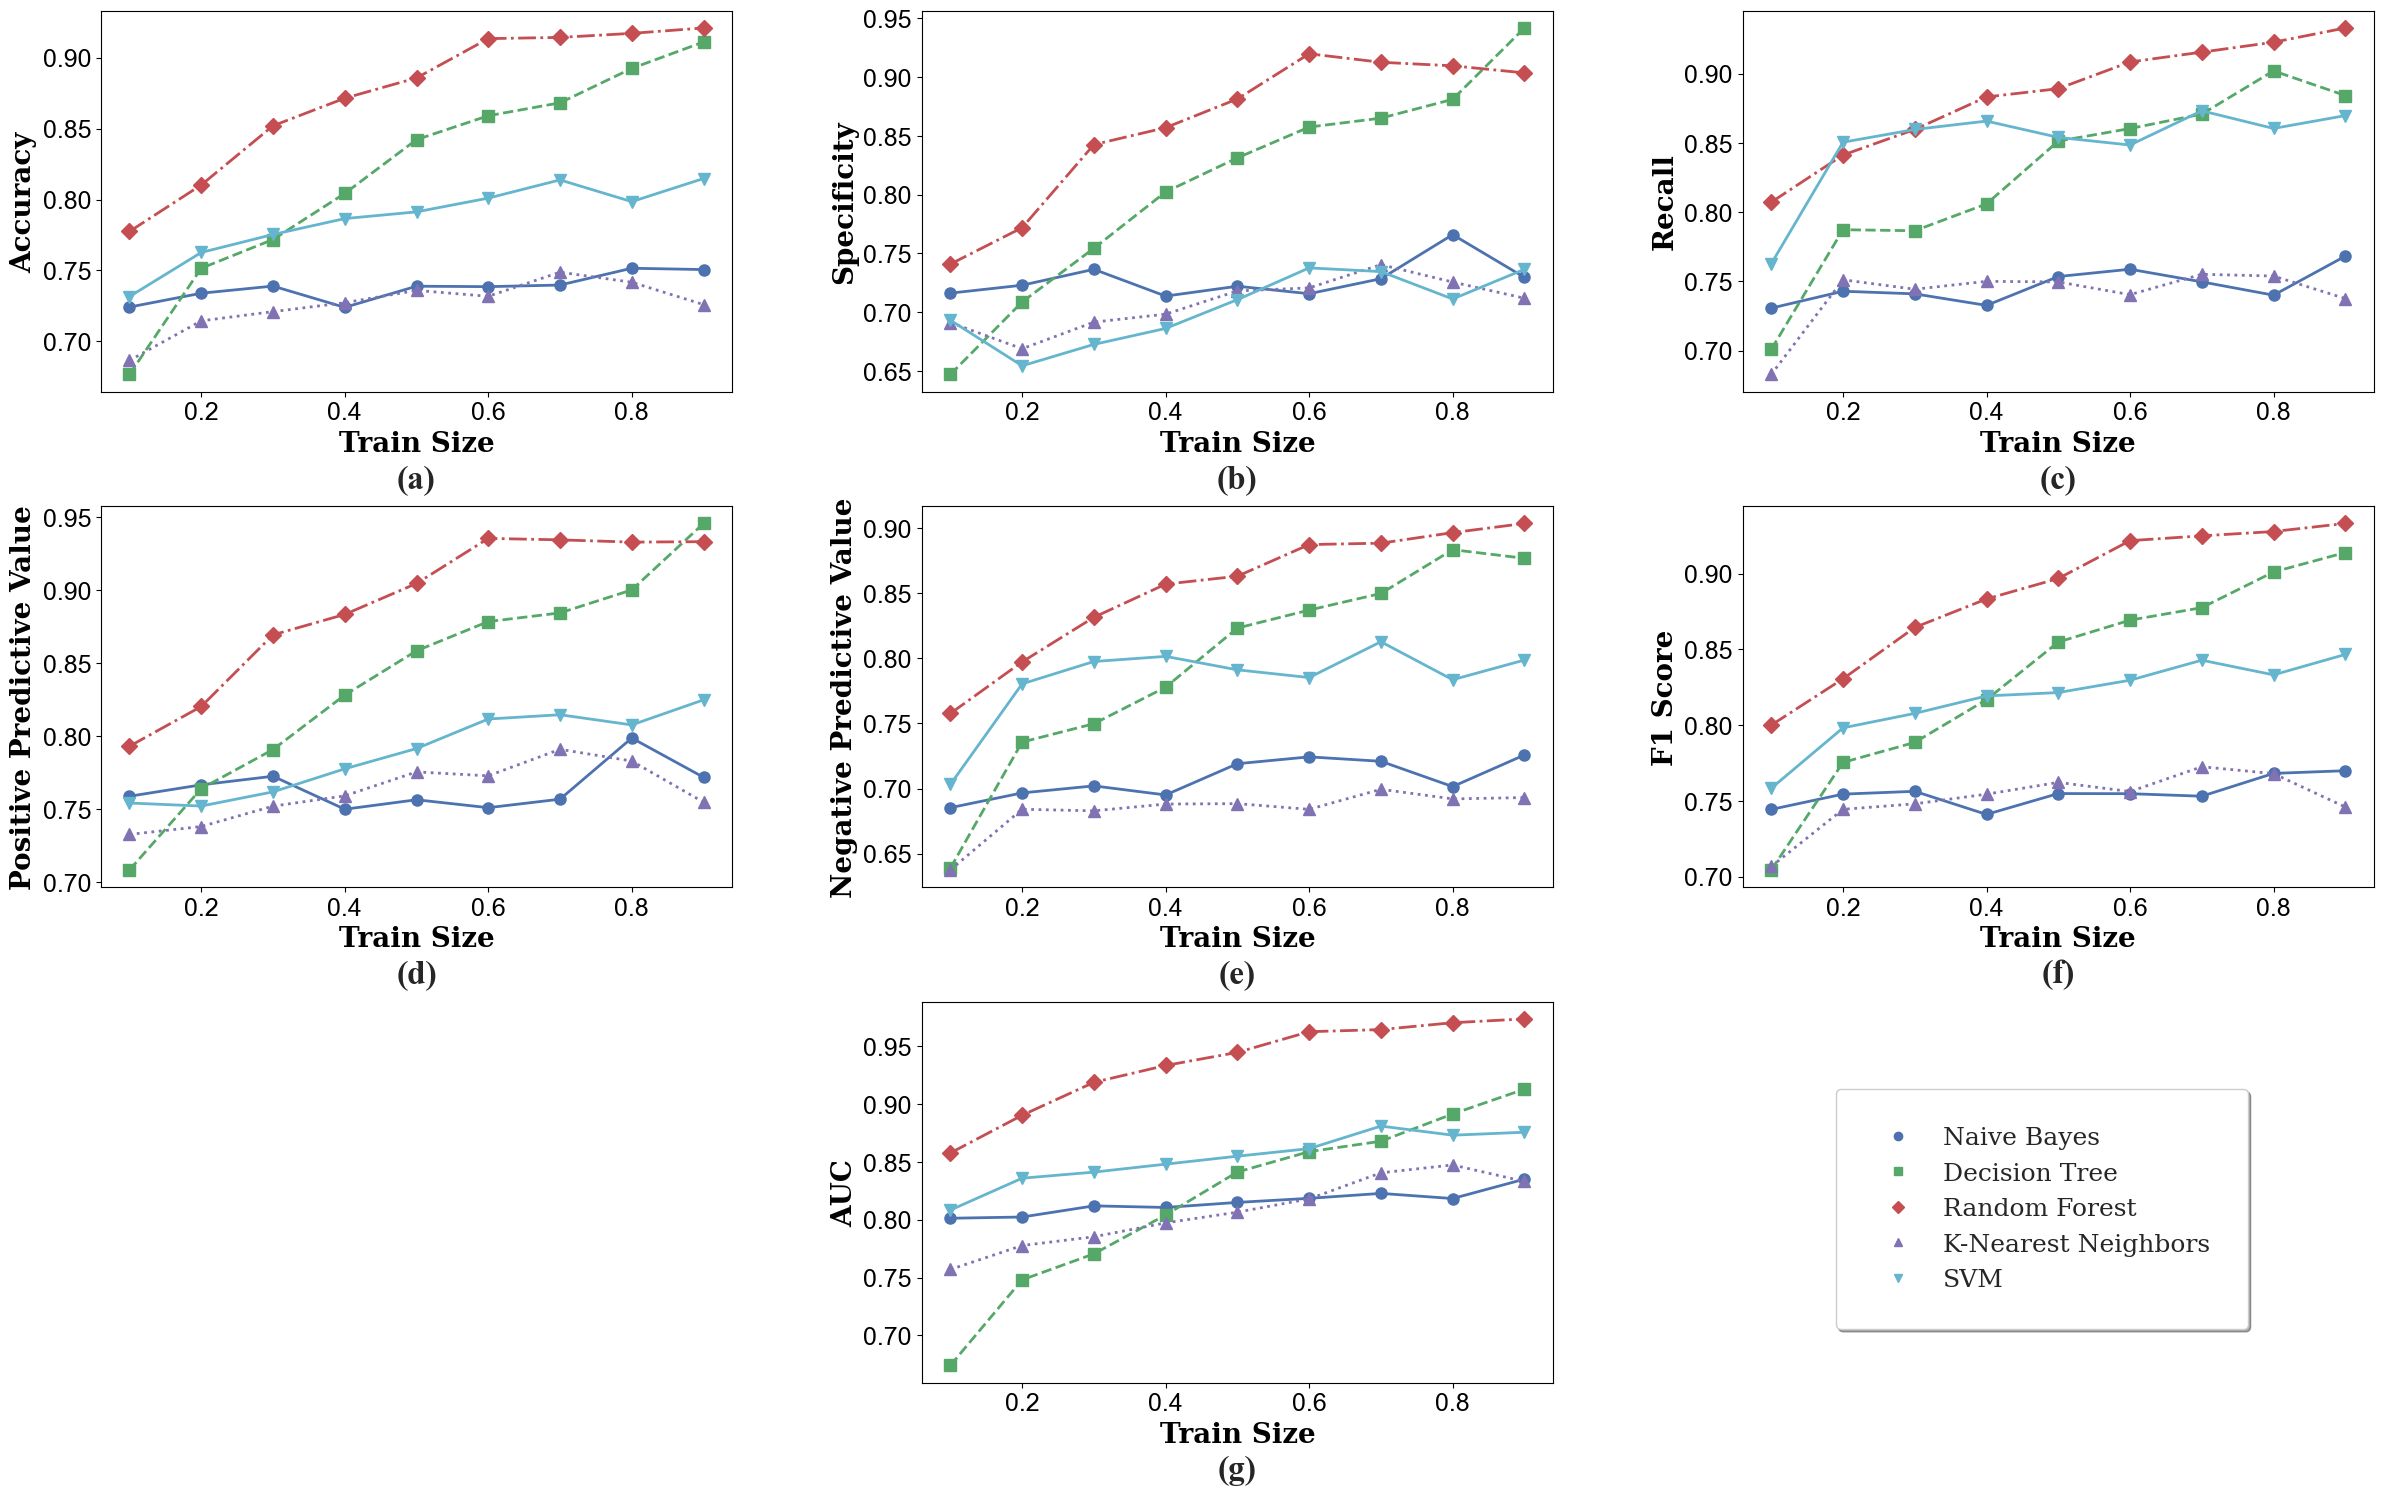

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data
train_sizes = np.linspace(0.1, 0.9, 9)

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(24, 15))  # Adjusted figsize for better fit
sns.set(style="whitegrid")

# Accuracies
axes[0, 0].plot(train_sizes, accuracies_nb, marker='o', label='Naive Bayes', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_dtc, marker='s', label='Decision Tree', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_rf, marker='D', label='Random Forest', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_knn, marker='^', label='K-Nearest Neighbors', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 0].plot(train_sizes, accuracies_svm, marker='v', label='SVM', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 0].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[0, 0].set_ylabel('Accuracy', fontsize=20, fontweight='bold', family='serif')

# Add label (a)
axes[0, 0].text(0.5, -0.25, '(a)', transform=axes[0, 0].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# Specificities
axes[0, 1].plot(train_sizes, specificities_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 1].plot(train_sizes, specificities_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 1].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[0, 1].set_ylabel('Specificity', fontsize=20, fontweight='bold', family='serif')

# Add label (b)
axes[0, 1].text(0.5, -0.25, '(b)', transform=axes[0, 1].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# Recalls
axes[0, 2].plot(train_sizes, recalls_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[0, 2].plot(train_sizes, recalls_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[0, 2].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[0, 2].set_ylabel('Recall', fontsize=20, fontweight='bold', family='serif')

# Add label (c)
axes[0, 2].text(0.5, -0.25, '(c)', transform=axes[0, 2].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# Positive Predictive Values
axes[1, 0].plot(train_sizes, positive_predictive_values_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, positive_predictive_values_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, positive_predictive_values_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, positive_predictive_values_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 0].plot(train_sizes, positive_predictive_values_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 0].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[1, 0].set_ylabel('Positive Predictive Value', fontsize=20, fontweight='bold', family='serif')

# Add label (d)
axes[1, 0].text(0.5, -0.25, '(d)', transform=axes[1, 0].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# NPVs
axes[1, 1].plot(train_sizes, npvs_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, npvs_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, npvs_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, npvs_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 1].plot(train_sizes, npvs_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 1].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[1, 1].set_ylabel('Negative Predictive Value', fontsize=20, fontweight='bold', family='serif')

# Add label (e)
axes[1, 1].text(0.5, -0.25, '(e)', transform=axes[1, 1].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# F1 Scores
axes[1, 2].plot(train_sizes, f1_scores_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, f1_scores_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, f1_scores_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, f1_scores_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[1, 2].plot(train_sizes, f1_scores_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[1, 2].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[1, 2].set_ylabel('F1 Score', fontsize=20, fontweight='bold', family='serif')

# Add label (f)
axes[1, 2].text(0.5, -0.25, '(f)', transform=axes[1, 2].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# AUCs
axes[2, 1].plot(train_sizes, aucs_nb, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
axes[2, 1].plot(train_sizes, aucs_dtc, marker='s', linestyle='--', color='g', markersize=8, linewidth=2)
axes[2, 1].plot(train_sizes, aucs_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=2)
axes[2, 1].plot(train_sizes, aucs_knn, marker='^', linestyle=':', color='m', markersize=8, linewidth=2)
axes[2, 1].plot(train_sizes, aucs_svm, marker='v', linestyle='-', color='c', markersize=8, linewidth=2)
axes[2, 1].set_xlabel('Train Size', fontsize=20, fontweight='bold', family='serif')
axes[2, 1].set_ylabel('AUC', fontsize=20, fontweight='bold', family='serif')

# Add label (g)
axes[2, 1].text(0.5, -0.25, '(g)', transform=axes[2, 1].transAxes, fontsize=24, fontweight='bold', ha='center', family='Times New Roman')

# Hide any unused subplots
axes[2, 0].axis('off')
axes[2, 2].axis('off')

# Create a dummy plot to include the legend
dummy_plot = fig.add_subplot(1, 1, 1, frameon=False)
dummy_plot.plot([], [], 'o', label='Naive Bayes', color='b')
dummy_plot.plot([], [], 's', label='Decision Tree', color='g')
dummy_plot.plot([], [], 'D', label='Random Forest', color='r')
dummy_plot.plot([], [], '^', label='K-Nearest Neighbors', color='m')
dummy_plot.plot([], [], 'v', label='SVM', color='c')
dummy_plot.legend(loc='lower right', bbox_to_anchor=(.95, 0.03), frameon=True, fancybox=True, shadow=True, borderpad=1.5, prop={'size': 18, 'family': 'serif'})
dummy_plot.axis('off')  # Hide the axis for the dummy plot

# Adjust tick label font size
for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=18)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig('Images/10_ml_classifier_metrics.png', transparent=True)
# Show plot
plt.show()

In [11]:
print('Average Accuracy: ')
print('nb: ', sum(accuracies_nb) / 9)
print('dtc: ', sum(accuracies_dtc) / 9)
print('rf: ', sum(accuracies_rf) / 9)
print('knn: ', sum(accuracies_knn)/ 9)
print('svm: ', sum(accuracies_svm) / 9)

Average Accuracy: 
nb:  0.7378123906209294
dtc:  0.8197096219632484
rf:  0.8736562603536009
knn:  0.725911339813992
svm:  0.7861811360226085


In [12]:
print('Average Specificity: ')
print('nb: ', sum(specificities_nb) / 9)
print('dtc: ', sum(specificities_dtc) / 9)
print('rf: ', sum(specificities_rf) / 9)
print('knn: ', sum(specificities_knn) / 9)
print('svm: ', sum(specificities_svm) / 9)

Average Specificity: 
nb:  0.7279877397452299
dtc:  0.8099452969226143
rf:  0.8599601168431019
knn:  0.7074893891663757
svm:  0.7041797336027503


In [13]:
print('Average Recall: ')
print('nb: ', sum(recalls_nb) / 9)
print('dtc: ', sum(recalls_dtc) / 9)
print('rf: ', sum(recalls_rf) / 9)
print('knn: ', sum(recalls_knn) / 9)
print('svm: ', sum(recalls_svm) / 9)

Average Recall: 
nb:  0.7463402101142456
dtc:  0.8277126385246619
rf:  0.8844940199415301
knn:  0.7405037568841273
svm:  0.8493986141521306


In [14]:
print('Average PPV: ')
print('nb: ', sum(positive_predictive_values_nb) / 9)
print('dtc: ', sum(positive_predictive_values_dtc) / 9)
print('rf: ', sum(positive_predictive_values_rf) / 9)
print('knn: ', sum(positive_predictive_values_knn) / 9)
print('svm: ', sum(positive_predictive_values_svm) / 9)

Average PPV: 
nb:  0.7646073568680601
dtc:  0.8396945608030415
rf:  0.8894899288715248
knn:  0.7619645556651344
svm:  0.7883246120200562


In [15]:
print('Average NPV: ')
print('nb: ', sum(npvs_nb) / 9)
print('dtc: ', sum(npvs_dtc) / 9)
print('rf: ', sum(npvs_rf) / 9)
print('knn: ', sum(npvs_knn) / 9)
print('svm: ', sum(npvs_svm) / 9)

Average NPV: 
nb:  0.7078918193349547
dtc:  0.7969836883595914
rf:  0.853622813764978
knn:  0.6833278662859533
svm:  0.7838065229988119


In [16]:
print('Average F1-Score: ')
print('nb: ', sum(f1_scores_nb) / 9)
print('dtc: ', sum(f1_scores_dtc) / 9)
print('rf: ', sum(f1_scores_rf) / 9)
print('knn: ', sum(f1_scores_knn) / 9)
print('svm: ', sum(f1_scores_svm) / 9)

Average F1-Score: 
nb:  0.7552477662648004
dtc:  0.8335329135064232
rf:  0.8869248108198977
knn:  0.7509753871565673
svm:  0.8174782924744951


In [17]:
print('Average AUC: ')
print('nb: ', sum(aucs_nb) / 9)
print('dtc: ', sum(aucs_dtc) / 9)
print('rf: ', sum(aucs_rf) / 9)
print('knn: ', sum(aucs_knn) / 9)
print('svm: ', sum(aucs_svm) / 9)

Average AUC: 
nb:  0.8151437423698724
dtc:  0.818828967723638
rf:  0.9352605212472164
knn:  0.8070178300579844
svm:  0.8533700534563062
